## Machine Learning com Scikit learn 1 - Regressão Linear e Regressão Logística

Tutorial made from 'Machine Learning com Scikit learn 1 - Regressão Linear e Regressão Logística' (Jonas Bitencourt) by Marcus Mariano

Link -> https://www.youtube.com/watch?v=miGfAY6De-0

##  Regressão Linear 

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Regressão Linear

dados = {'Idade' : [20, 25, 30, 35, 40, 45, 50, 55, 60, 65],
         'Peso' : [90, 85, 80, 75, 70, 65, 60, 55, 50, 45],
         'QI' : [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]}

In [4]:
df1 = pd.DataFrame(dados)

In [5]:
df1

,Idade,Peso,QI
0,20,90,100
1,25,85,150
2,30,80,200
3,35,75,250
4,40,70,300
5,45,65,350
6,50,60,400
7,55,55,450
8,60,50,500
9,65,45,550


In [6]:
df1.corr()

,Idade,Peso,QI
Idade,1.0,-1.0,1.0
Peso,-1.0,1.0,-1.0
QI,1.0,-1.0,1.0


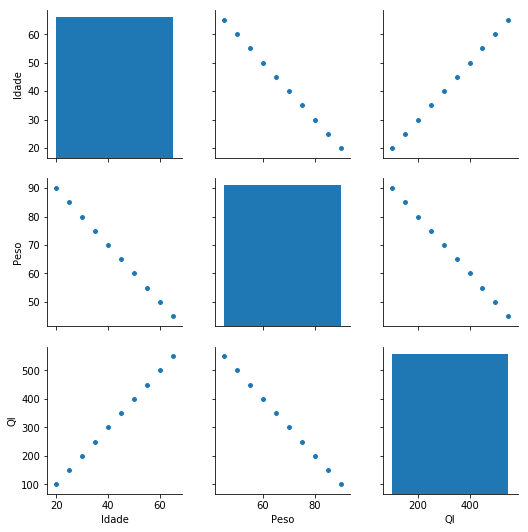

In [7]:
sns.pairplot(df1)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df1.drop('QI', axis=1)
y = df1[['QI']]

In [10]:
X

,Idade,Peso
0,20,90
1,25,85
2,30,80
3,35,75
4,40,70
5,45,65
6,50,60
7,55,55
8,60,50
9,65,45


In [11]:
y

,QI
0,100
1,150
2,200
3,250
4,300
5,350
6,400
7,450
8,500
9,550


In [28]:
# tamanho do test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [29]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
# Trainar modelo
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# Testar modelo
pred = lm.predict(X_test)
pred

array([[200.],
       [550.],
       [100.]])

In [16]:
lm.predict([[70, 40], [75, 35]])

array([[600.],
       [650.]])

In [34]:
df1

,Idade,Peso,QI
0,20,90,100
1,25,85,150
2,30,80,200
3,35,75,250
4,40,70,300
5,45,65,350
6,50,60,400
7,55,55,450
8,60,50,500
9,65,45,550


In [18]:
# dis de desperção
dis = pd.DataFrame(X_test)
# previsão
dis['Pred'] = pred
dis

,Idade,Peso,Pred
7,55,55,450.0
8,60,50,500.0
9,65,45,550.0


In [19]:
# dis de desperção
dis = pd.DataFrame(y_test)
# Previsão
dis['Pred'] = pred
dis

,QI,Pred
7,450,450.0
8,500,500.0
9,550,550.0


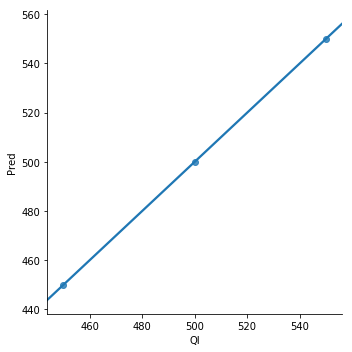

In [20]:
# 
sns.lmplot(x='QI', y='Pred', data=dis)

In [24]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.3263464400855204e-13
MSE: 2.692645223154387e-26
RMSE: 1.640928159047308e-13


## Regressão Logística

In [3]:
# Regressão Logística

# 'Lucro' : [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

dados2 = {'Custo' : [10, 10, 20, 30, 10, 25, 20, 15, 30, 10],
         'Venda' : [10, 15, 15, 35, 20, 25, 20, 20, 40, 10],
         'Lucro' : ['N', 'S', 'N', 'S', 'S', 'N', 'N', 'S', 'S', 'N']}

In [4]:
df2 = pd.DataFrame(dados2)
df2

,Custo,Venda,Lucro
0,10,10,N
1,10,15,S
2,20,15,N
3,30,35,S
4,10,20,S
5,25,25,N
6,20,20,N
7,15,20,S
8,30,40,S
9,10,10,N


In [5]:
def lucro_bin(valor):
    if valor =='S':
        return 1
    else:
        return 0

In [6]:
df2['Lucro_bin'] = df2['Lucro'].apply(lucro_bin)

In [7]:
df2

,Custo,Venda,Lucro,Lucro_bin
0,10,10,N,0
1,10,15,S,1
2,20,15,N,0
3,30,35,S,1
4,10,20,S,1
5,25,25,N,0
6,20,20,N,0
7,15,20,S,1
8,30,40,S,1
9,10,10,N,0


In [8]:
df2.drop('Lucro', axis=1,inplace=True)

In [9]:
df2

,Custo,Venda,Lucro_bin
0,10,10,0
1,10,15,1
2,20,15,0
3,30,35,1
4,10,20,1
5,25,25,0
6,20,20,0
7,15,20,1
8,30,40,1
9,10,10,0


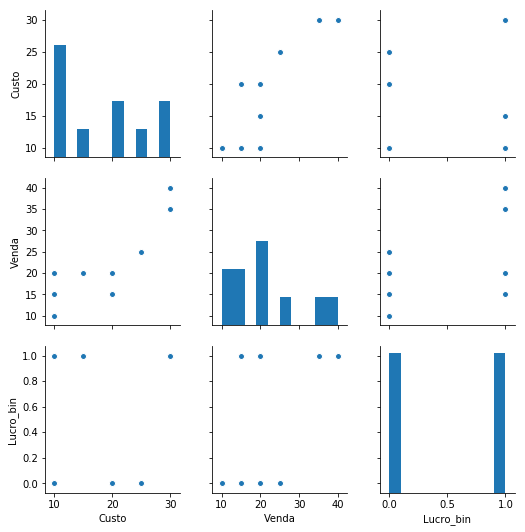

In [10]:
sns.pairplot(df2)

In [101]:
X = df2.drop('Lucro_bin', axis=1)
y = df2['Lucro_bin']

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [111]:
# tamanho do test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LogisticRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

dis = pd.DataFrame(y_test)
dis['Pred'] = pred

In [112]:
dis

,Lucro_bin,Pred
2,0,0
4,1,1
5,0,0


In [113]:
y_test

2    0
4    1
5    0
Name: Lucro_bin, dtype: int64

In [114]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         3



In [109]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

In [115]:
print(confusion_matrix(y_test,pred))

[[2 0]
 [0 1]]
